### Q2(A)

In [36]:
import pandas as pd

In [37]:
measurement_data = pd.read_csv('/content/Measurement_Q1 (1).csv')

In [38]:
measurement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         150 non-null    int64  
 1   Measurement  150 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [39]:
measurement_data.head()

,Time,Measurement
0,1,1.84
1,2,3.93
2,3,4.00
3,4,5.42
4,5,6.89


In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
model = ARIMA(measurement_data["Measurement"], order=(0,1,1))

In [42]:
model_fit = model.fit()

In [43]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Measurement   No. Observations:                  150
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.609
Date:                Fri, 04 Oct 2024   AIC                            409.217
Time:                        22:40:25   BIC                            415.225
Sample:                             0   HQIC                           411.658
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7531      0.060     12.573      0.000       0.636       0.871
sigma2         0.8834      0.109      8.080      0.000       0.669       1.098
Ljung-Box (L1) (Q):                   0.26   Jarque-

### Q2(B)

In [44]:
measurement_data_2 = measurement_data.copy()

In [45]:
measurement_data_2 = measurement_data_2["Measurement"].diff()

<Axes: >

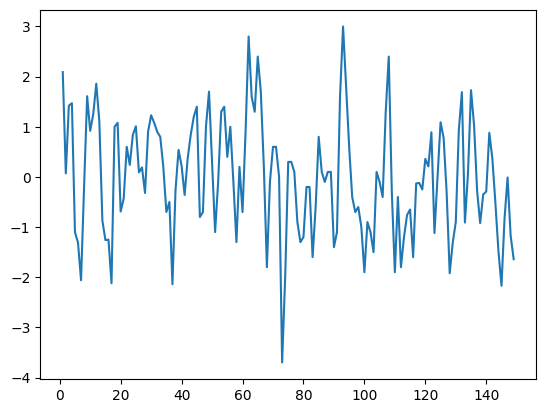

In [46]:
measurement_data_2.plot()

### Q2 (C)

Both models are the same thing as IMA integrates differencing, where as MA data is manually differenced. Both models ma.L1 coefficient (0.7531) are the same. This coefficient tells how much correlation in the the previous lag and the current term, and how much of it has it captured in the model.


In [47]:
model_2 = ARIMA(measurement_data_2, order=(0,0,1))

In [48]:
model_fit_2 = model_2.fit()

In [49]:
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:            Measurement   No. Observations:                  150
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -202.607
Date:                Fri, 04 Oct 2024   AIC                            411.215
Time:                        22:40:26   BIC                            420.247
Sample:                             0   HQIC                           414.884
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.137     -0.047      0.962      -0.274       0.261
ma.L1          0.7531      0.061     12.392      0.000       0.634       0.872
sigma2         0.8834      0.110      8.052      0.0

### Q3 (A)

In [51]:
passengers_data = pd.read_csv('/content/ch1passengers_HW3.csv')

In [52]:
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           201 non-null    object
 1   Year           201 non-null    int64 
 2   Month          201 non-null    int64 
 3   DOMESTIC       201 non-null    object
 4   INTERNATIONAL  201 non-null    object
 5   TOTAL          201 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [53]:
passengers_data.head()

,Date,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002-10-01,2002,10,"48,054,917","9,578,435","57,633,352"
1,2002-11-01,2002,11,"44,850,246","9,016,535","53,866,781"
2,2002-12-01,2002,12,"49,684,353","10,038,794","59,723,147"
3,2003-1-01,2003,1,"43,032,450","9,726,436","52,758,886"
4,2003-2-01,2003,2,"41,166,780","8,283,372","49,450,152"


### Q3 (A)

In [90]:
data_passengers = passengers_data.copy()

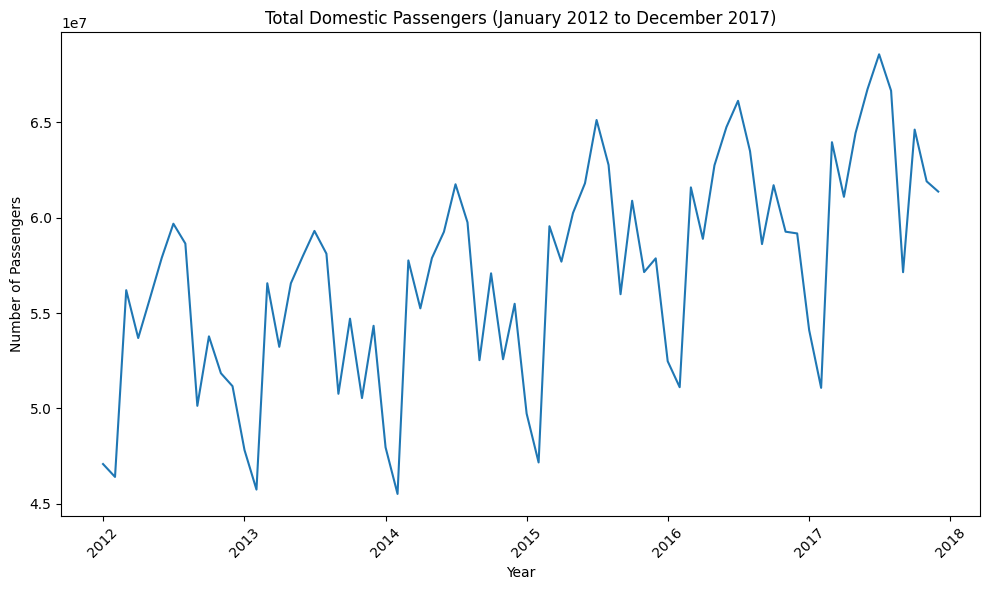

In [91]:
data_passengers['Date'] = pd.to_datetime(data_passengers['Date'], errors='coerce')

filtered_data = data_passengers[(data_passengers['Date'] >= '2012-01-01') & (data_passengers['Date'] <= '2017-12-31')]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(filtered_data['Date'], filtered_data['DOMESTIC'].str.replace(",", "").astype(float), label='Domestic Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Total Domestic Passengers (January 2012 to December 2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q3 (B)

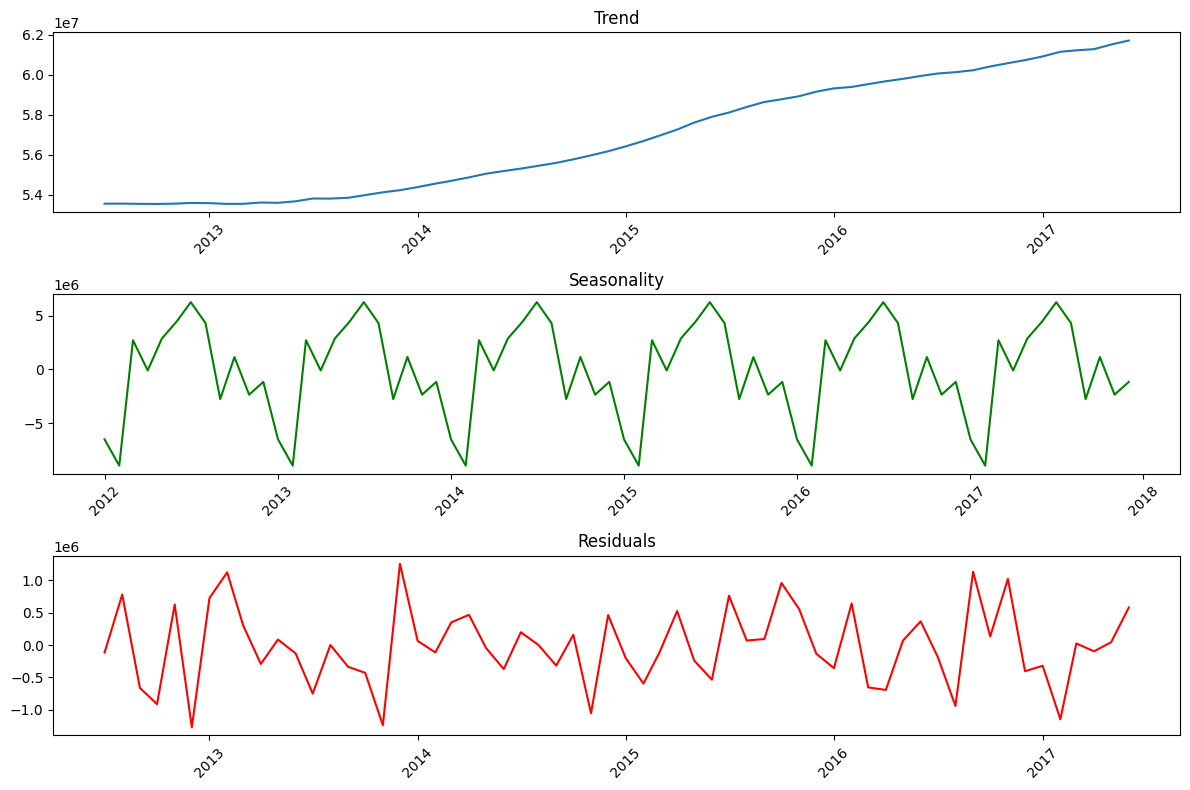

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

domestic_passengers = filtered_data['DOMESTIC'].str.replace(",", "").astype(float)


decomposition = seasonal_decompose(domestic_passengers, model='additive', period=12)

plt.figure(figsize=(12, 8))

# trend
plt.subplot(3, 1, 1)
plt.plot(filtered_data['Date'], decomposition.trend, label='Trend')
plt.title('Trend')
plt.xticks(rotation=45)

# seasonal component
plt.subplot(3, 1, 2)
plt.plot(filtered_data['Date'], decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.xticks(rotation=45)

# residuals
plt.subplot(3, 1, 3)
plt.plot(filtered_data['Date'], decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Q3 (C)

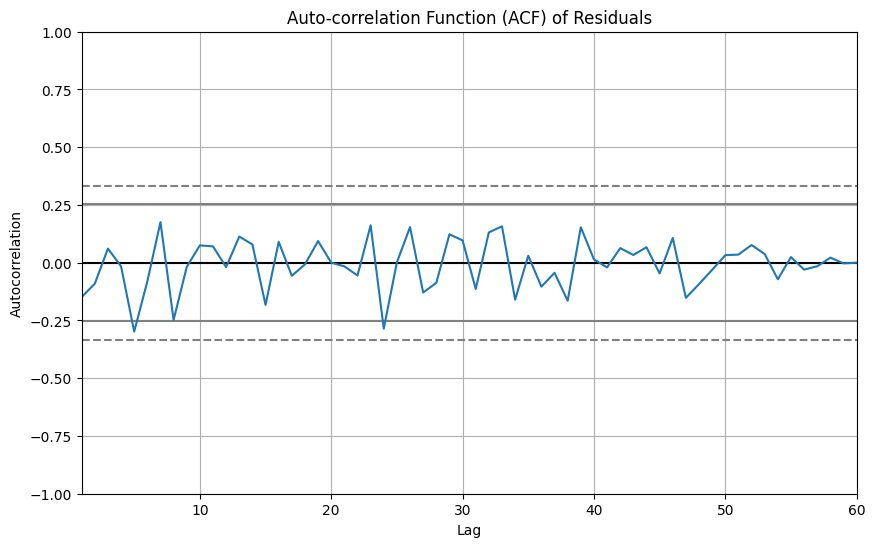

In [95]:
from pandas.plotting import autocorrelation_plot

residuals = decomposition.resid.dropna()

plt.figure(figsize=(10, 6))
autocorrelation_plot(residuals)
plt.title('Auto-correlation Function (ACF) of Residuals')
plt.show()

### Q3 (D)

The confidence interval formula is +- 1.96/SQRT(N) @ 95% confidence. The width of the confidence interval is 2 times 1.96/SQRT(N) i.e., 0.462. And the autocorrelation values not statistically correlated will be within range of +- 0.231.

### Q3 (E)

No lag in the plot is above or below the confidence interval meaning the lag is statistically insignificant. Hence the residual is white noise i.e., random.